In [2]:
### If you are running this on google colab, mount your google drive first
## If not, comment out the following lines

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab/Project/

Mounted at /content/drive
/content/drive/MyDrive/Colab/Project


In [1]:
# Load the transformed data
from transformed import *
import plotly.express as px

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 6 19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


The selected features are: ['flag', 'logged_in', 'count', 'serror_rate', 'srv_error_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'duration', 'dst_bytes']
X_train shape: (572285, 12)
X_test shape: (245265, 12)
y_train shape: (572285,)
y_test shape: (245265,)


# Step 1 - Data Summary

In [ ]:
# Pitou

### Generate summary statistics for the training set
X_train.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,src_dst_ratio
count,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.0,572285.000000,572285.000000,572285.000000,...,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000,572285.000000
mean,0.000898,0.028531,0.080229,0.201589,0.004975,0.024848,0.0,0.000002,0.000006,0.002435,...,0.633804,0.667960,0.033727,0.061550,0.016807,0.248834,0.248685,0.053501,0.052576,2.005507
std,0.026904,0.129873,0.146286,0.309630,0.033302,0.066375,0.0,0.001322,0.001851,0.041207,...,0.437828,0.434186,0.085229,0.174773,0.037093,0.430740,0.431608,0.218787,0.220275,25.687459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.066667,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003660,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087588
75%,0.000000,0.000000,0.181818,0.700000,0.002980,0.019640,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.060000,0.030000,0.020000,0.140000,0.030000,0.000000,0.000000,0.315068
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000


In [ ]:
# Pitou

# Generate summary statistics for the testing set
X_test.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,src_dst_ratio
count,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.0,245265.0,245265.000000,245265.000000,...,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000,245265.000000
mean,0.000828,0.028361,0.080015,0.201614,0.004931,0.024895,0.0,0.0,0.000003,0.002502,...,0.634217,0.667914,0.033971,0.061308,0.016869,0.248230,0.248131,0.054238,0.053287,2.023618
std,0.026000,0.129572,0.145475,0.309513,0.033077,0.067237,0.0,0.0,0.000808,0.042076,...,0.437775,0.434260,0.086368,0.174170,0.037057,0.430332,0.431295,0.220147,0.221701,25.826527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.066667,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003680,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087726
75%,0.000000,0.000000,0.181818,0.700000,0.002990,0.019750,0.0,0.0,0.000000,0.000000,...,1.000000,1.000000,0.060000,0.030000,0.020000,0.120000,0.020000,0.000000,0.000000,0.315068
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.200000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000


# Step 2 - Missing or Incomplete Data Check

In [ ]:
# Pitou

### Identify any missing or incomplete data
print('Number of missing values in the training set:')
print(X_train.isnull().sum())
print('Number of missing values in the testing set:')
print(X_test.isnull().sum())

Number of missing values in the training set:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                 

# Step 3 - Outlier Check

In [2]:
# Pitou

## Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

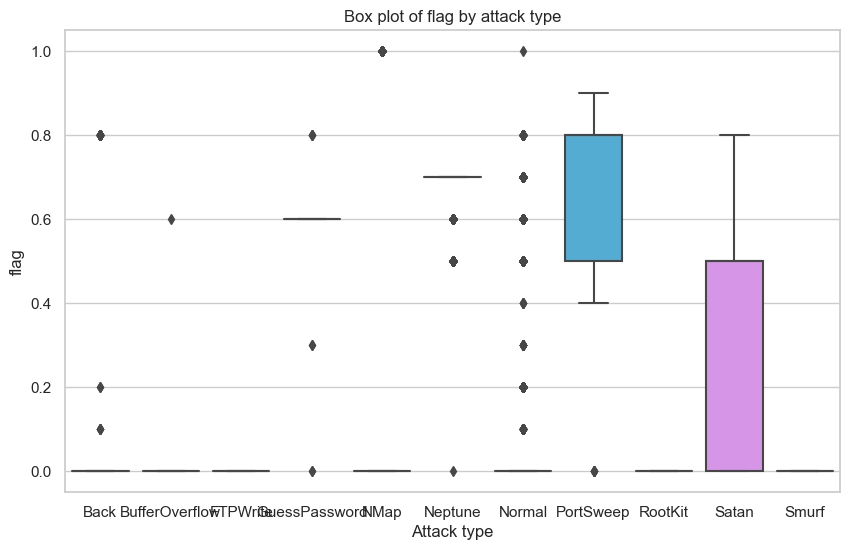

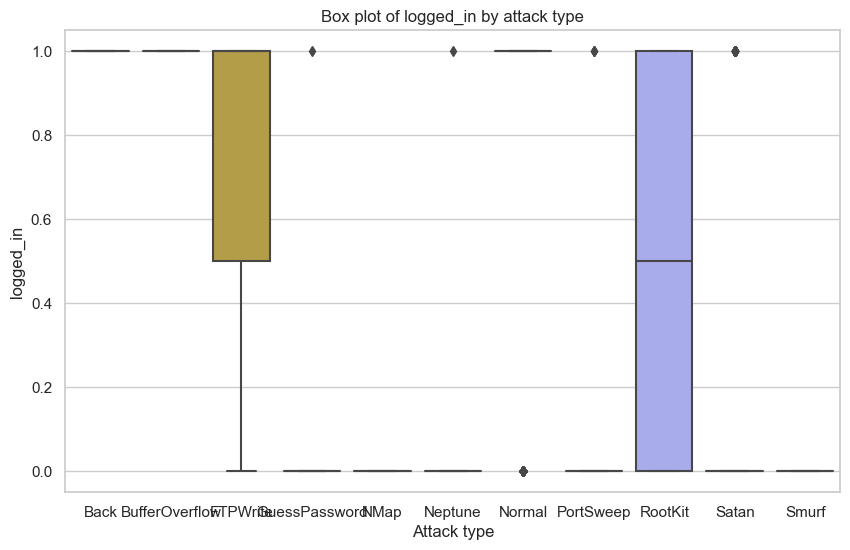

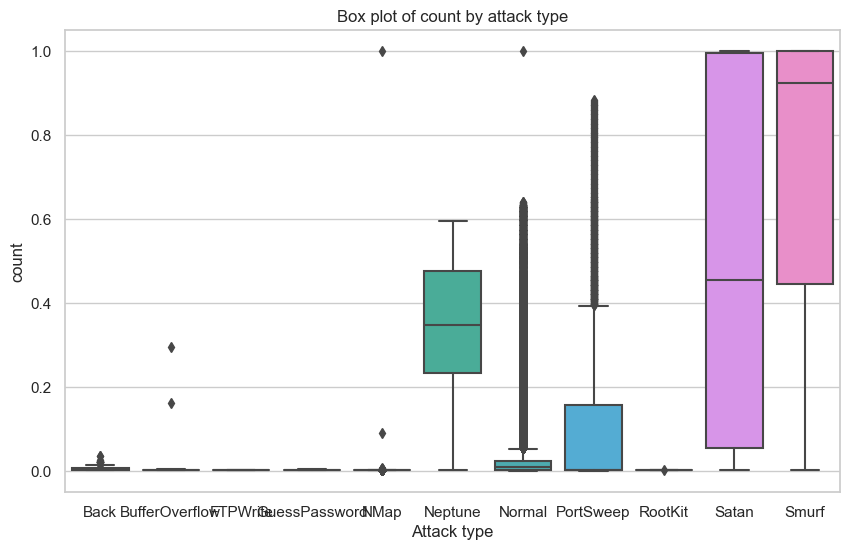

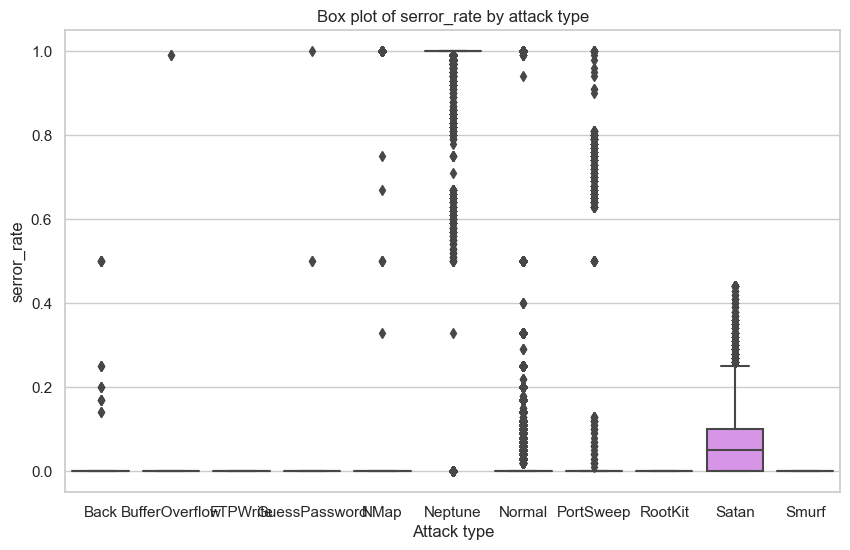

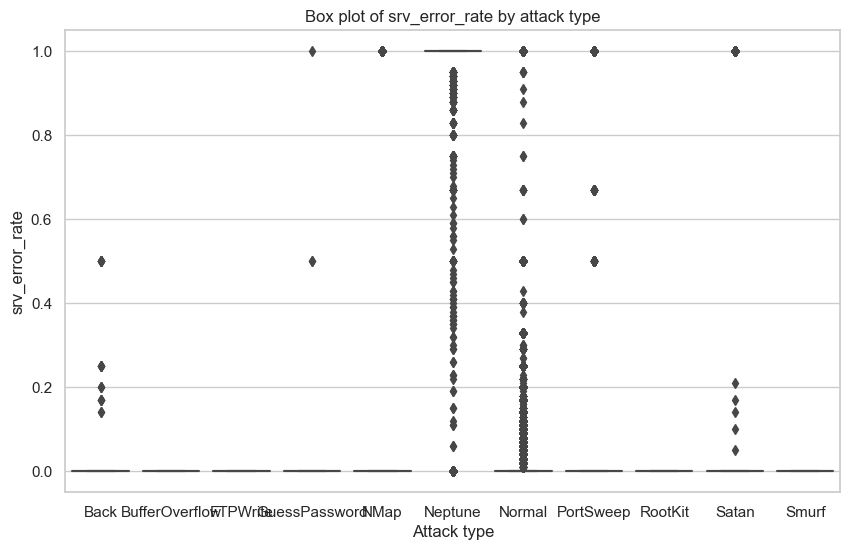

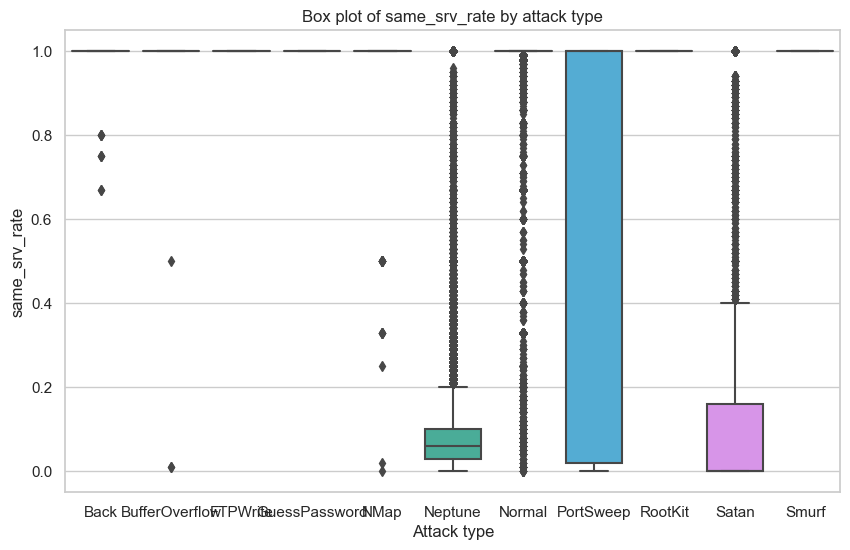

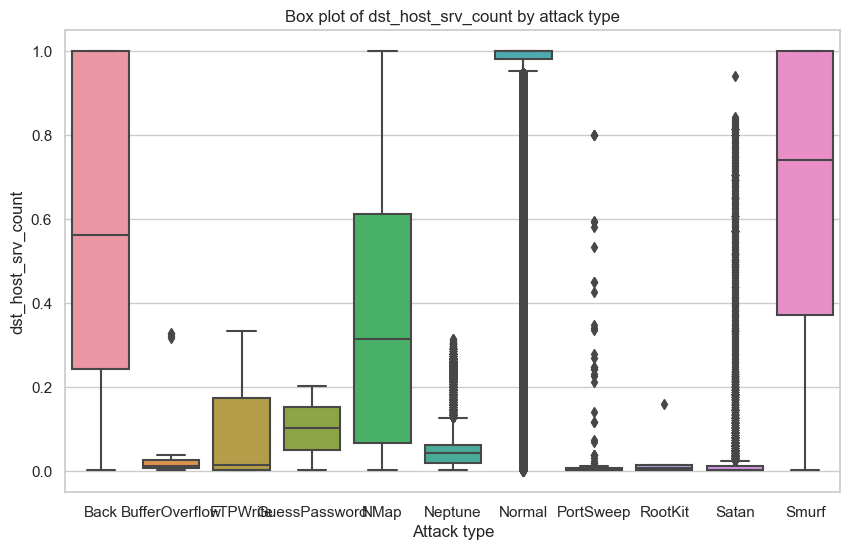

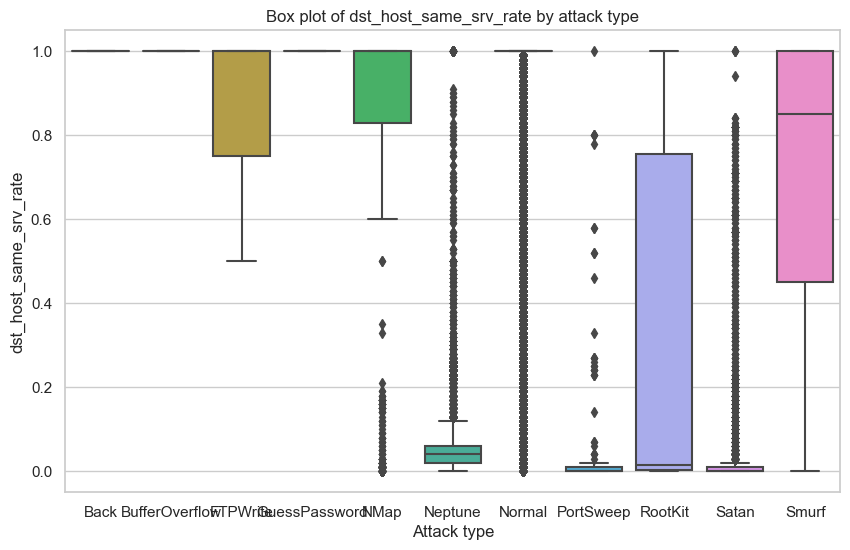

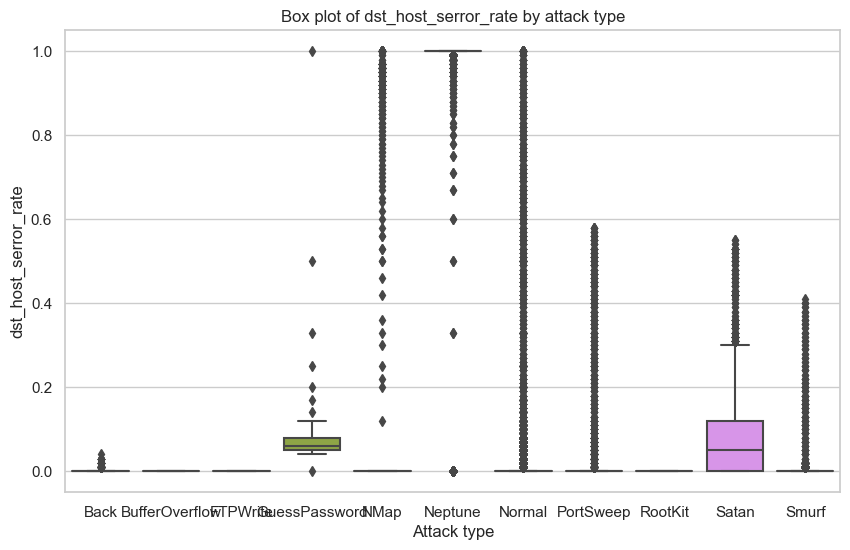

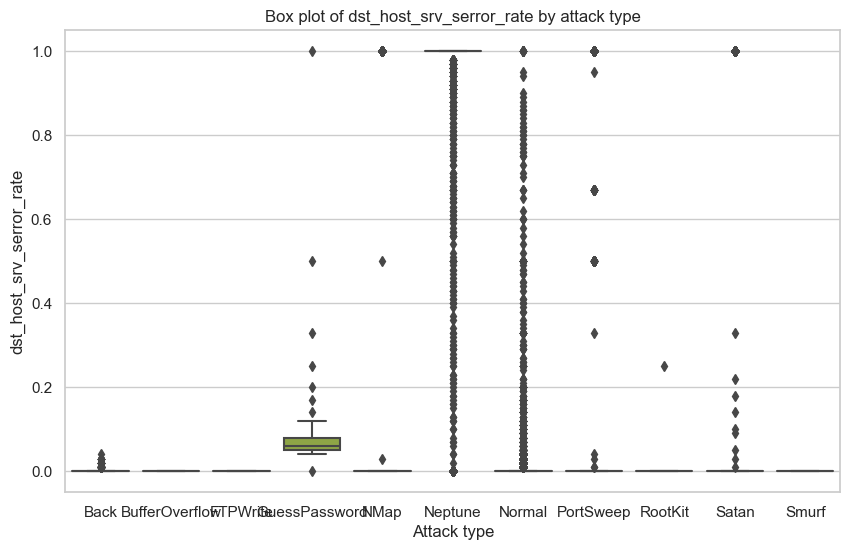

In [ ]:
# Pitou

### Create a list of selected features
features = selected_cols

### Loop through the features and create a box plot for each one
for feature in features:
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=(10,6))
    # Plot the box plot
    sns.boxplot(x='attack', y=feature, data=df, ax=ax)
    # Set the title and labels
    ax.set_title(f'Box plot of {feature} by attack type')
    ax.set_xlabel('Attack type')
    ax.set_ylabel(feature)
    # Show the plot
    plt.show()

In [ ]:
# Pitou

### OPTIONAL
#### # Loop through the features and remove outliers based on IQR
# for feature in features:
#   # Calculate the IQR
#   Q1 = df[feature].quantile(0.25)
#   Q3 = df[feature].quantile(0.75)
#   IQR = Q3 - Q1
#   # Define the lower and upper bounds for outliers
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   # Filter out the outliers from the data frame
#   df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# # Transform outliers: This is a way to reduce the impact of outliers on the analysis, without removing them from the data. A common transformation technique is to apply a logarithmic function to the data, which can help to reduce the skewness and make the distribution more symmetric. However, this may also change the interpretation of the data and affect some statistical tests. Here is a possible code snippet to implement this method:

#### Loop through the features and apply log transformation
# for feature in features:
#   # Add a small constant to avoid taking log of zero
#   df[feature] = np.log(df[feature] + 0.001)

# Step 4 - Data Visualizations

In [3]:
# Pitou

## Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

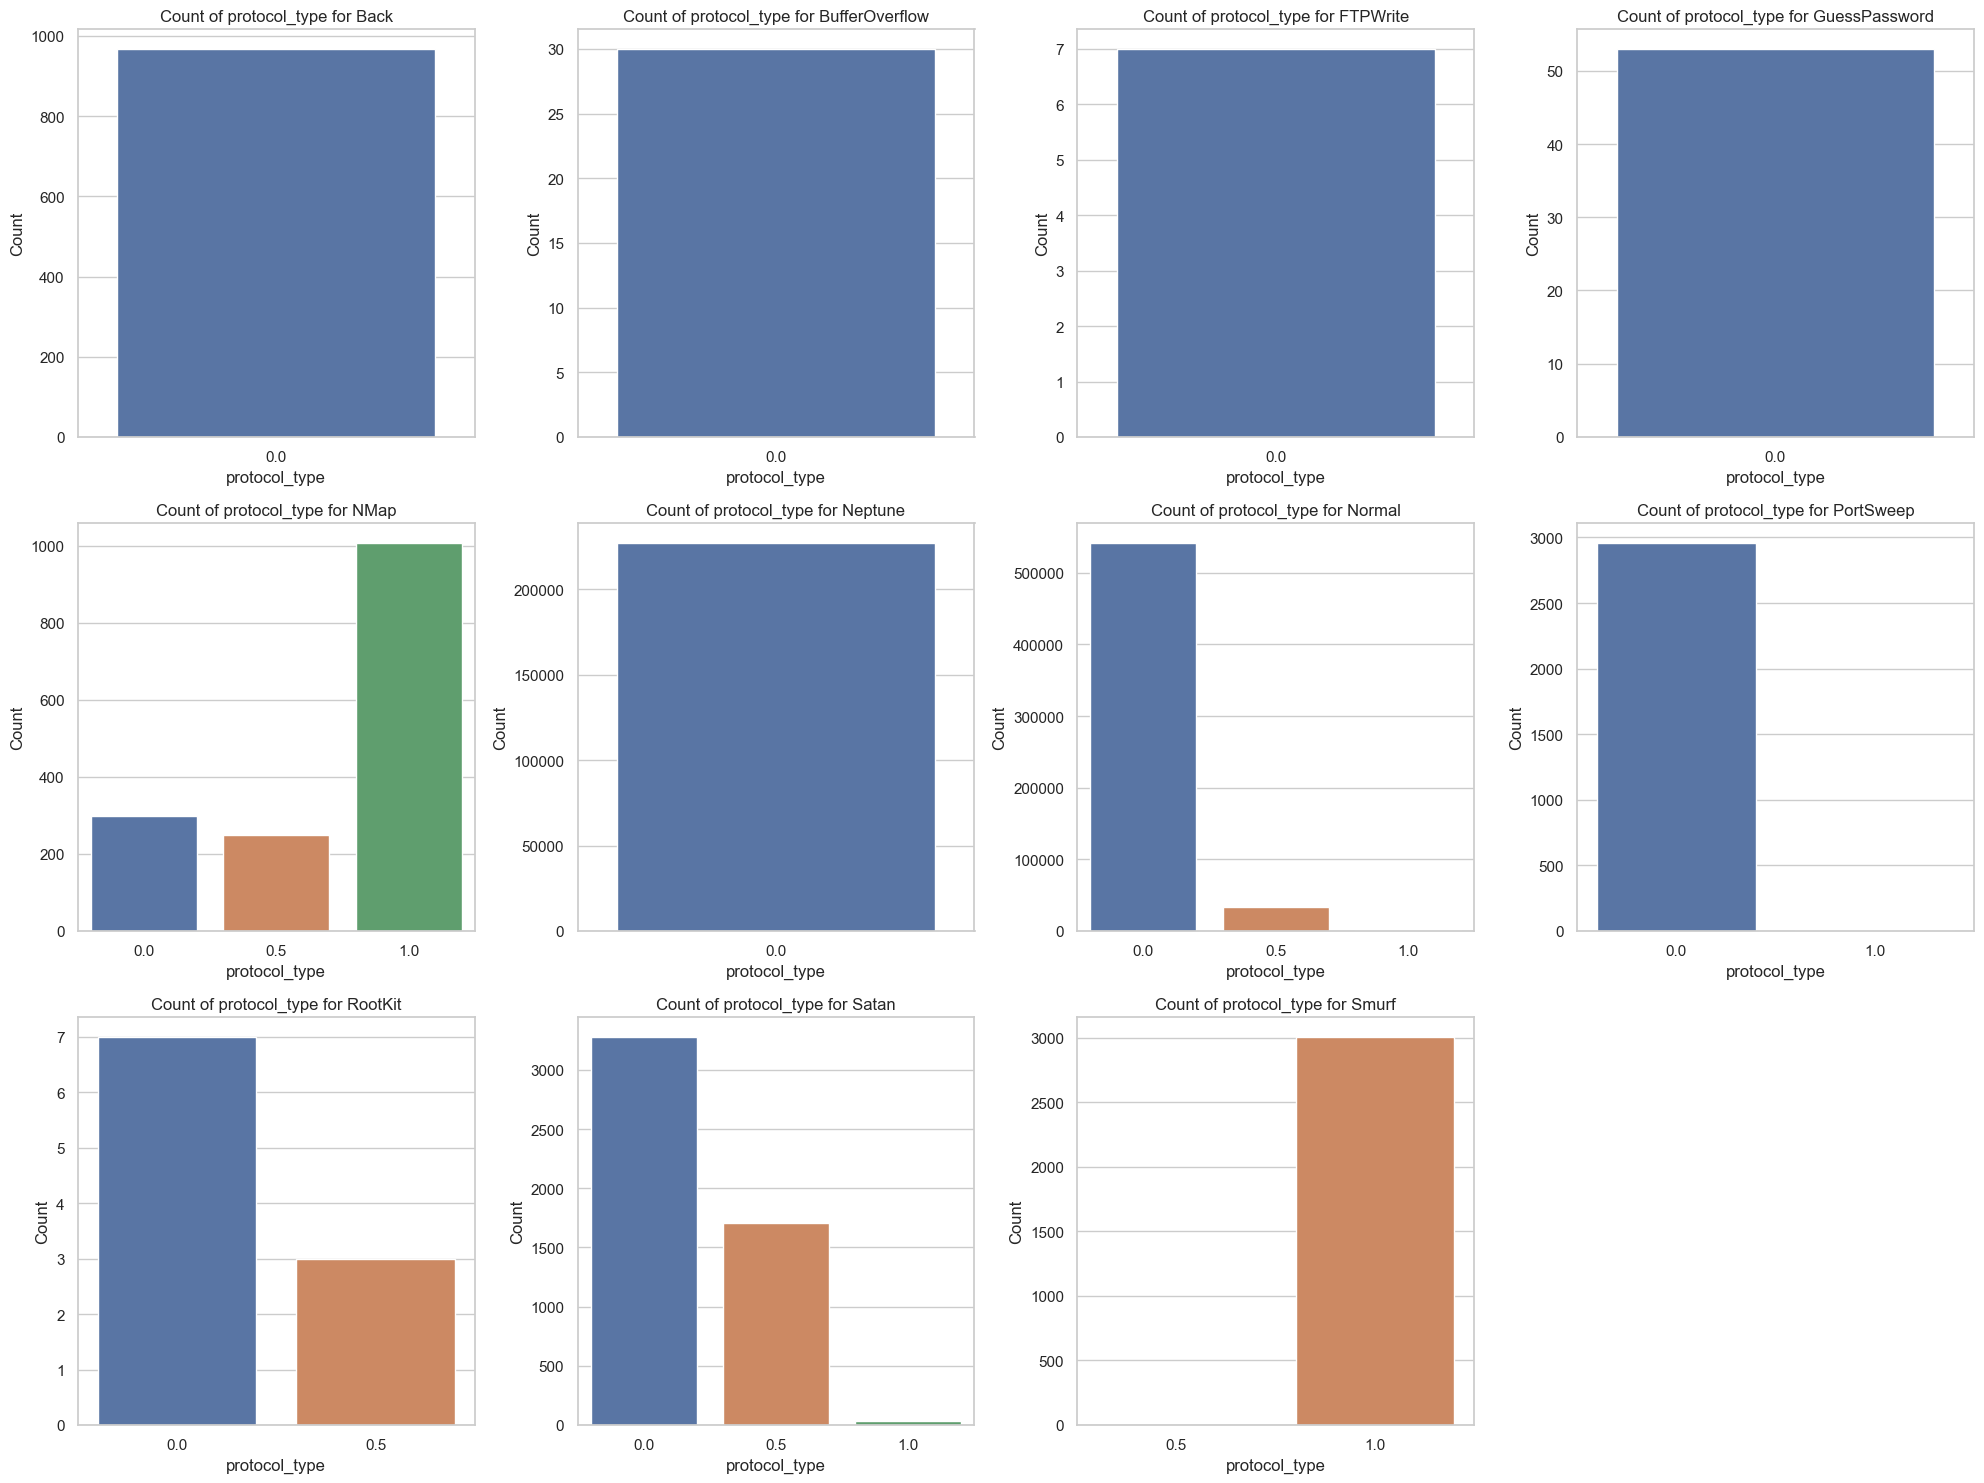

In [ ]:
# Pitou

attack_types = df['attack'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(attack_types) - 1) // 4 + 1
num_cols = min(len(attack_types), 4)

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Loop through each attack type and plot the count of protocol_type
for i, attack_type in enumerate(attack_types):
    sns.countplot(x='protocol_type', data=df[df['attack'] == attack_type], ax=axs[i])
    axs[i].set_title(f'Count of protocol_type for {attack_type}')
    axs[i].set_xlabel('protocol_type')
    axs[i].set_ylabel('Count')

# If there are any unused subplots, hide them
for i in range(len(attack_types), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

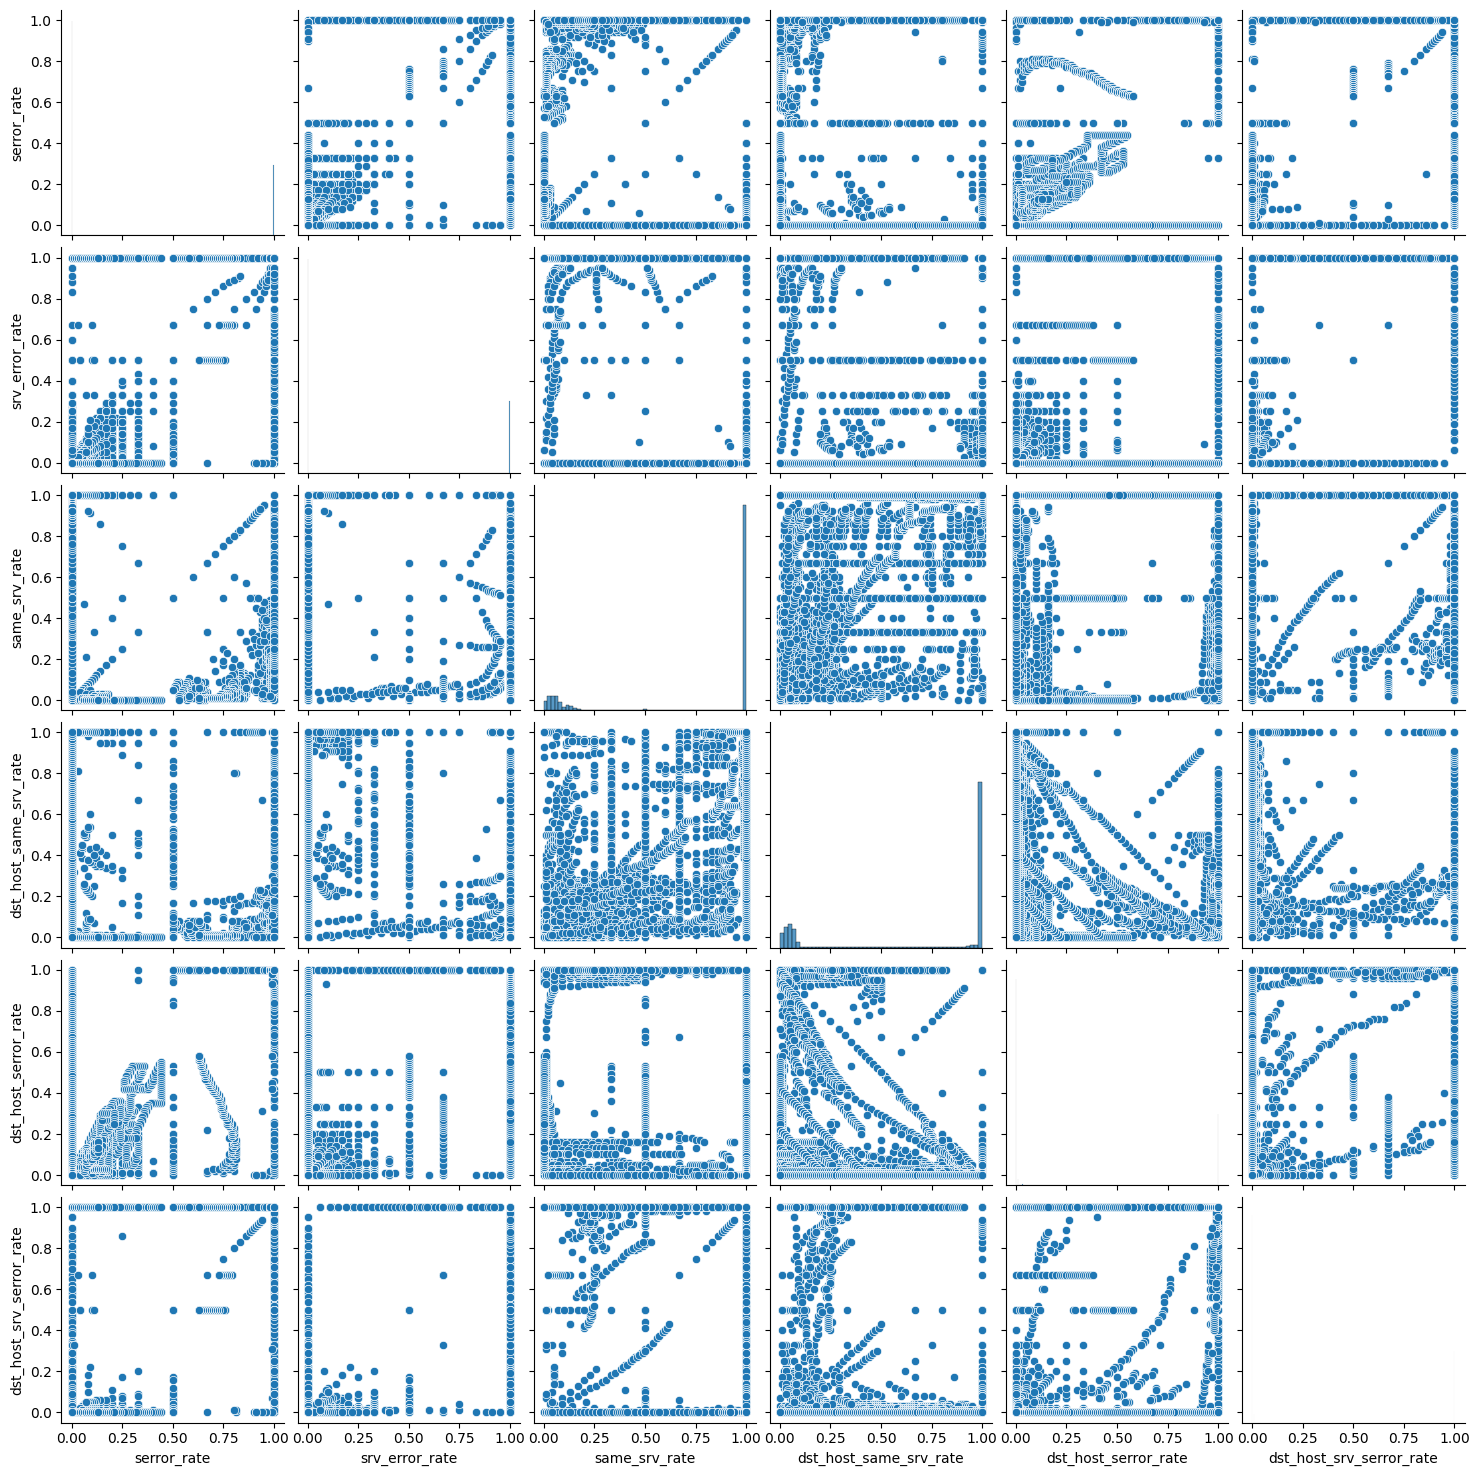

In [4]:
#Danet

# Select the columns of interest
numerical_columns = ['serror_rate', 'srv_error_rate', 'same_srv_rate', 'dst_host_same_srv_rate',
                     'dst_host_serror_rate', 'dst_host_srv_serror_rate']

# Create a pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(df[numerical_columns])
plt.show()


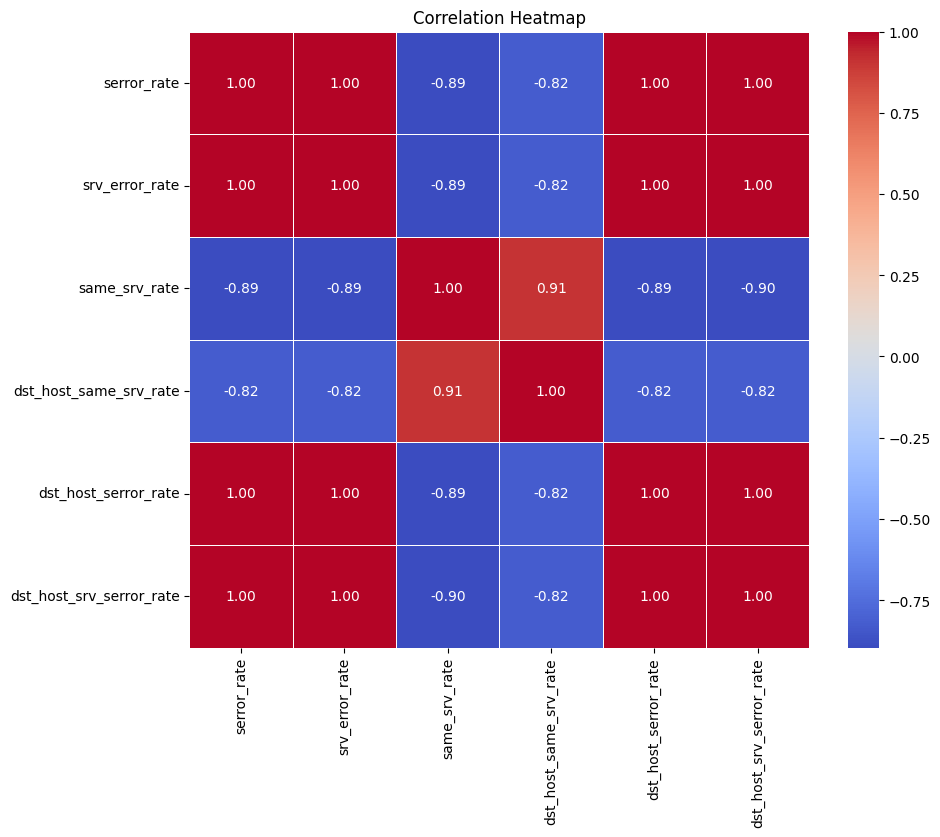

In [5]:
# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


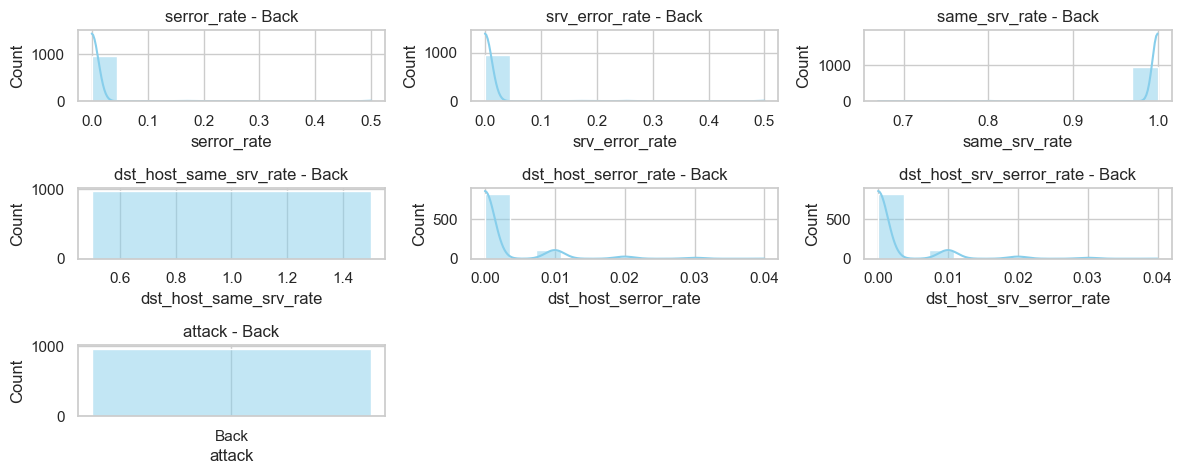

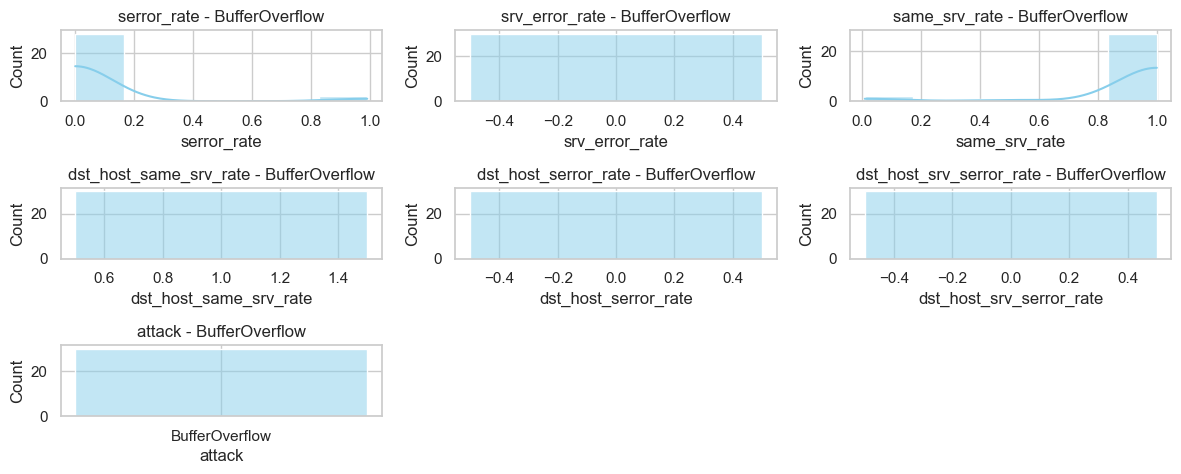

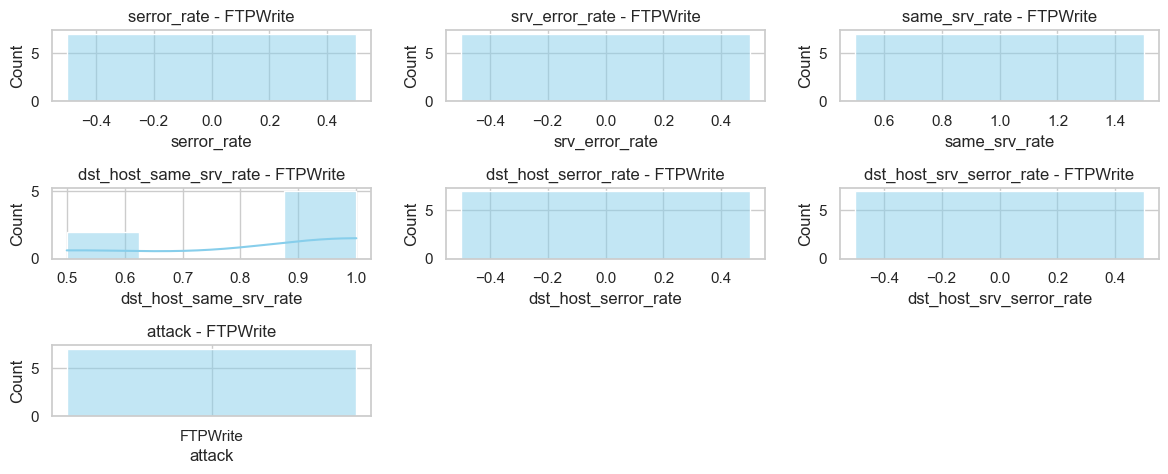

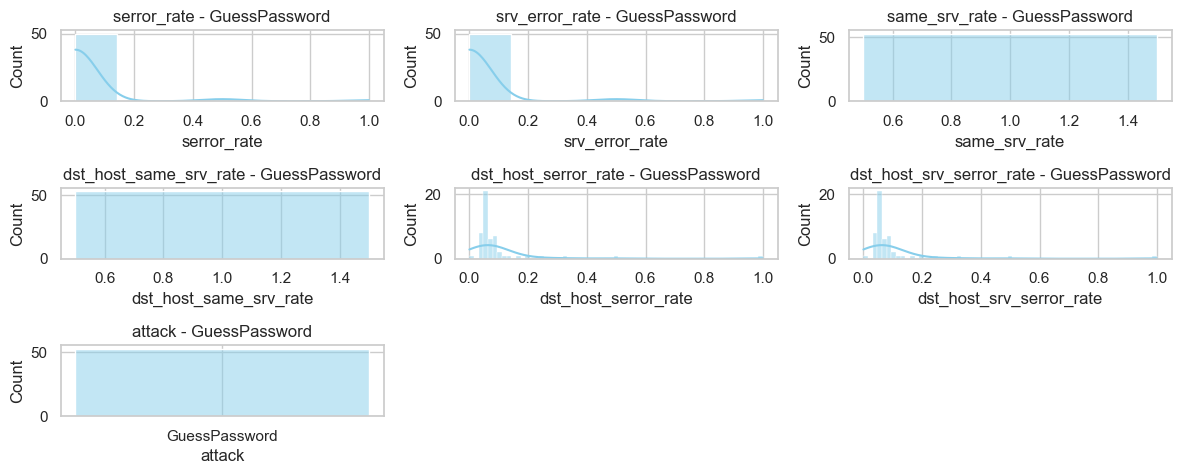

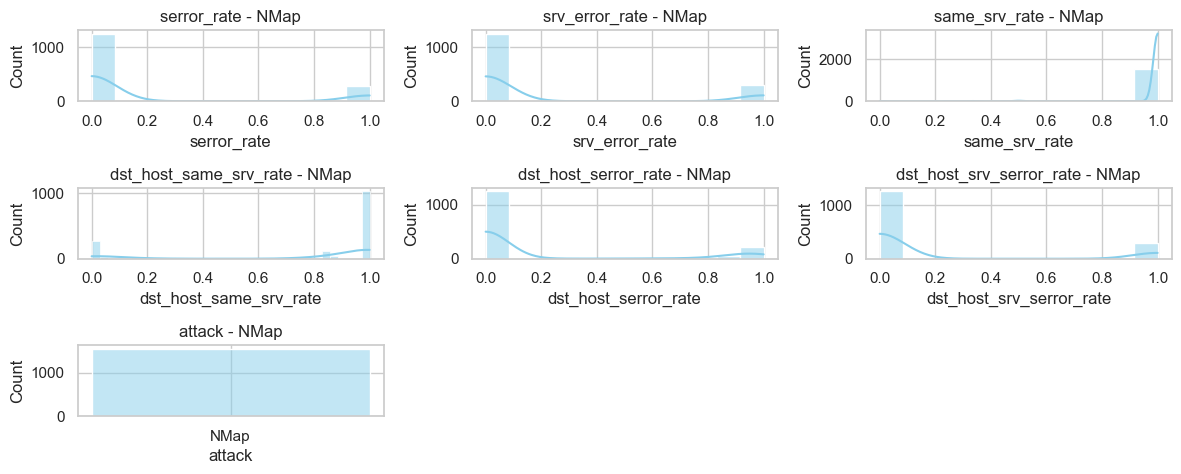

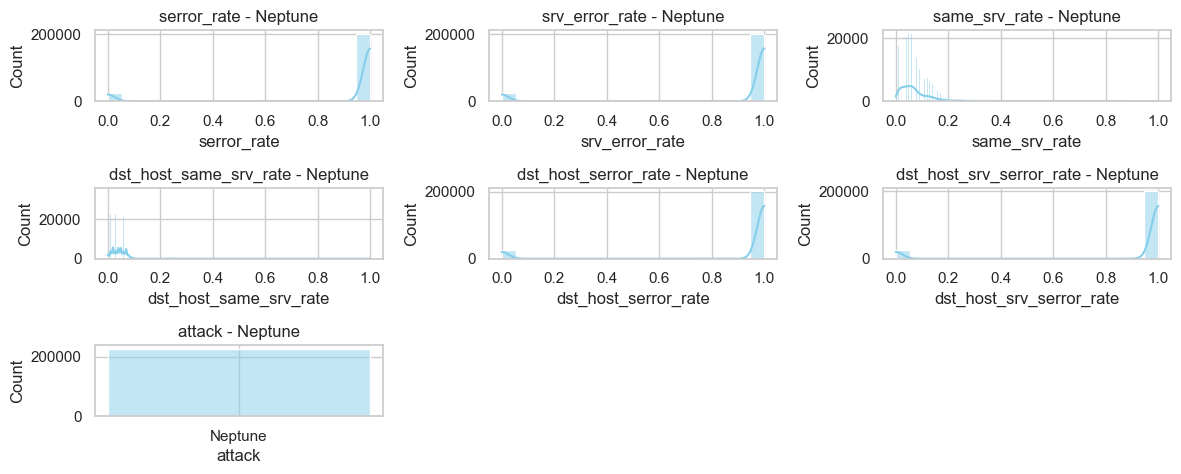

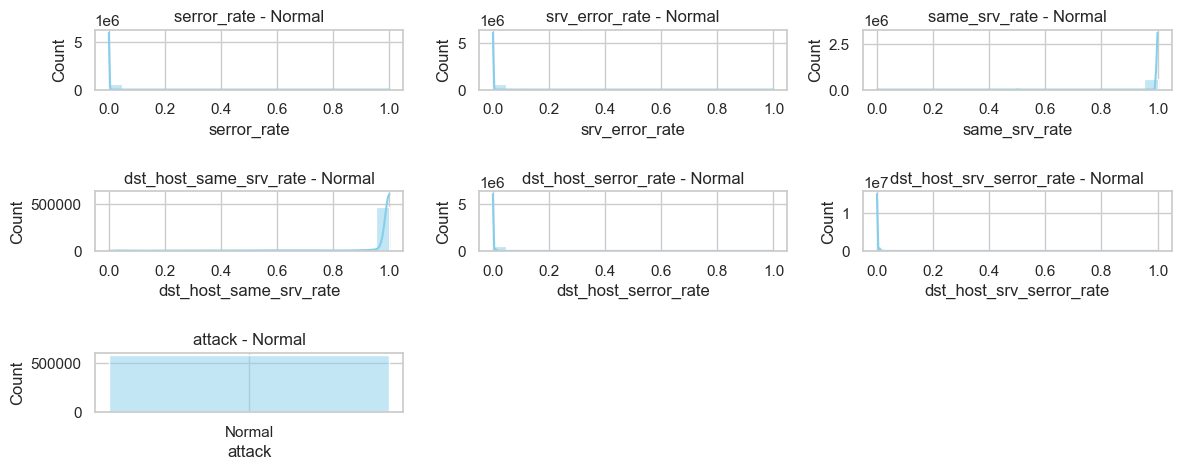

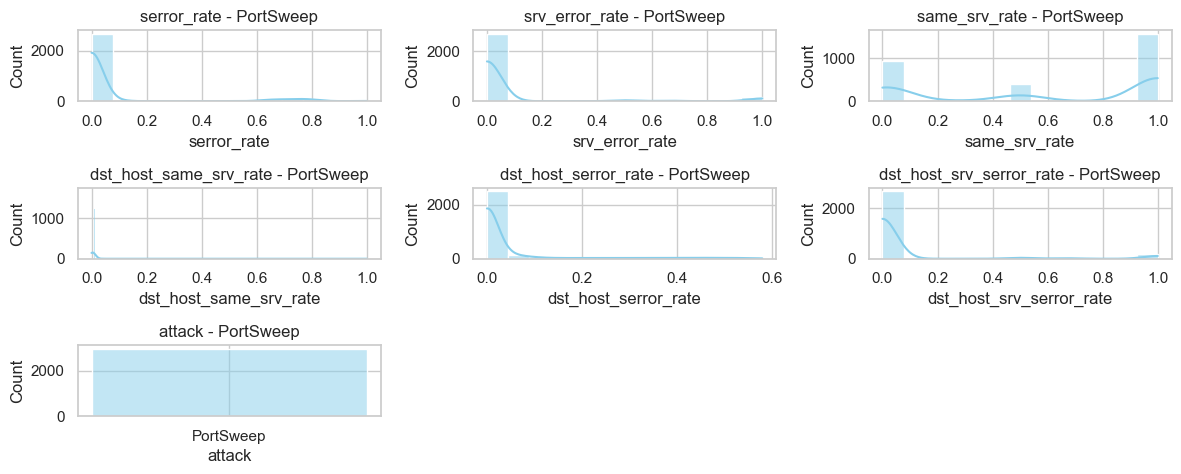

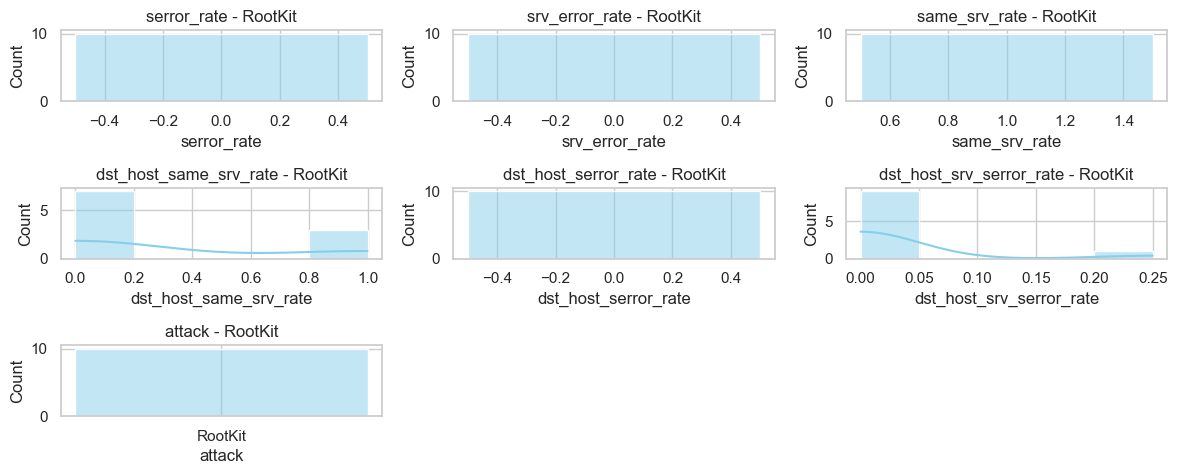

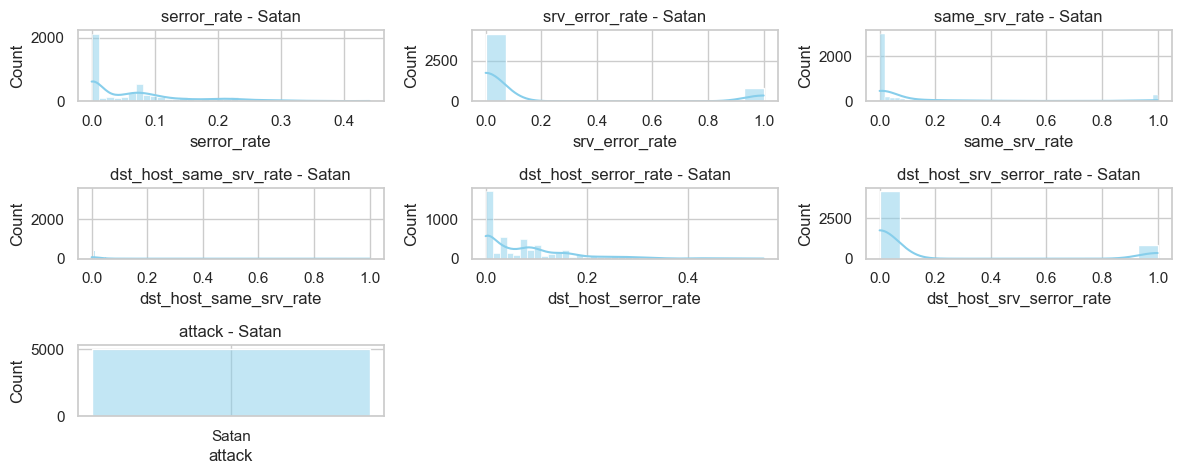

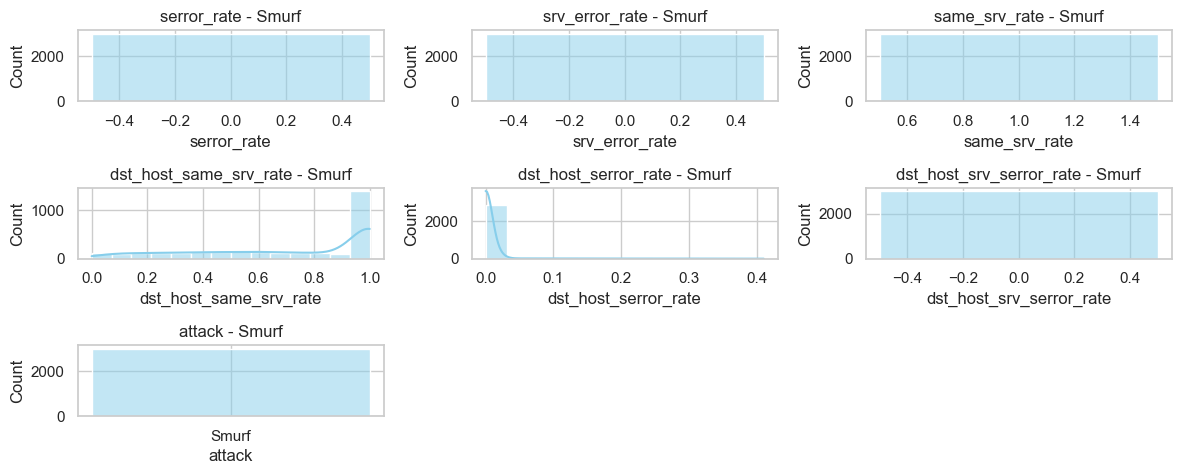

In [ ]:
#Danet

attack_types = df['attack'].unique()

# Calculate the number of rows and columns for subplot grid
num_rows = (len(attack_types) - 1) // 3 + 1
num_cols = min(len(attack_types), 3)

# Loop through each attack type and plot the distributions of numerical variables
for attack_type in attack_types:
    plt.figure(figsize=(12, 6))
    sns.set(style='whitegrid')

    # Filter data for the current attack type
    df_attack_type = df[df['attack'] == attack_type]

    # Plot the histograms or box plots for numerical variables
    for i, var in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data=df_attack_type, x=var, kde=True, color='skyblue')
        plt.title(var + ' - ' + attack_type)

    plt.tight_layout()
    plt.show()


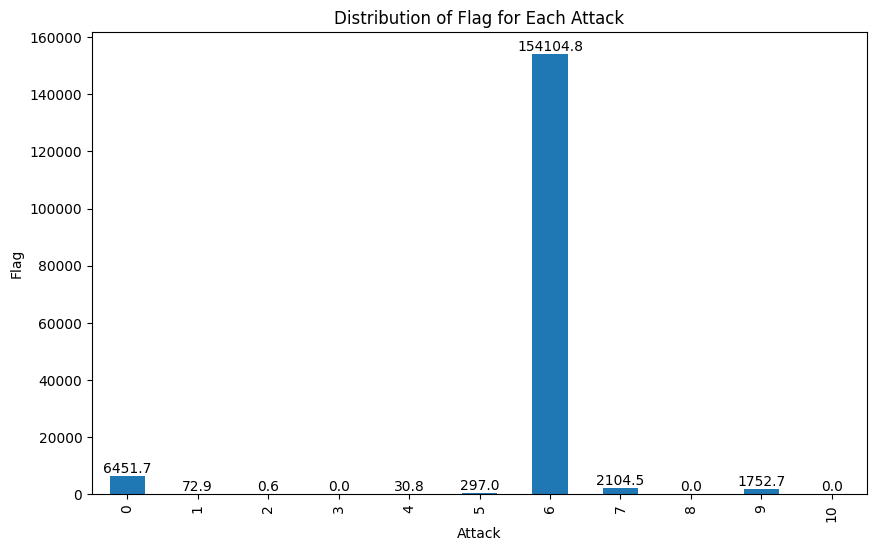

In [6]:
# sothirich

# Group the data by the 'attack' column and calculate the sum of 'flags' for each group
grouped_data = df.groupby('attack')['flag'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')

# Add labels and title
plt.xlabel('Attack')
plt.ylabel('Flag')
plt.title('Distribution of Flag for Each Attack')

# Add value labels on each bar
for idx, val in enumerate(grouped_data):
    plt.text(idx, val, str(round(val, 2)), ha='center', va='bottom')

# Show the bar chart
plt.show()

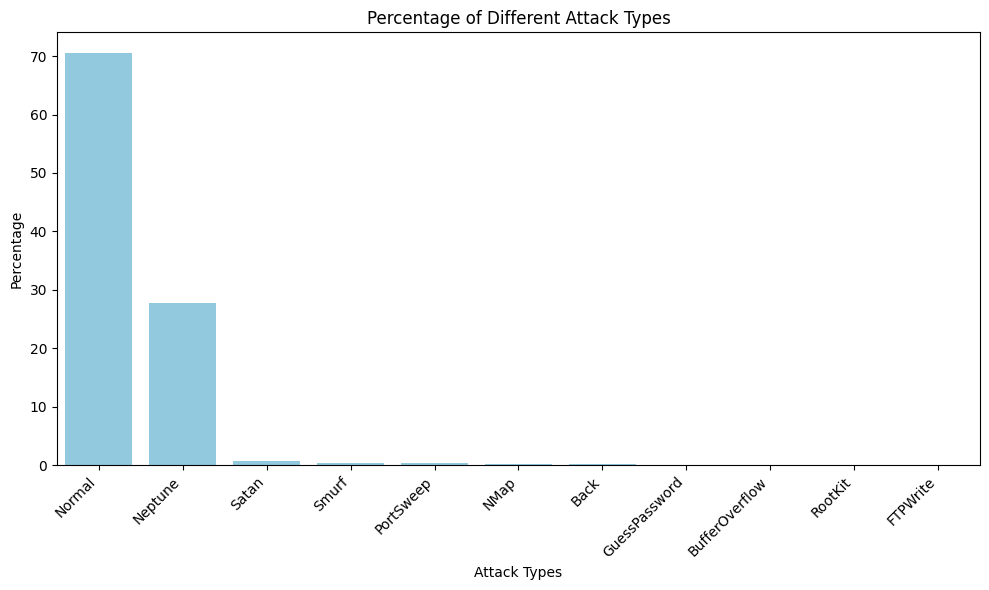

In [10]:
# Whatanak

attack_counts = df['attack'].value_counts()
total_attacks = len(df)
attack_percentages = attack_counts / total_attacks * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_percentages.index, y=attack_percentages, color='skyblue')

# Customize the plot
plt.title('Percentage of Different Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

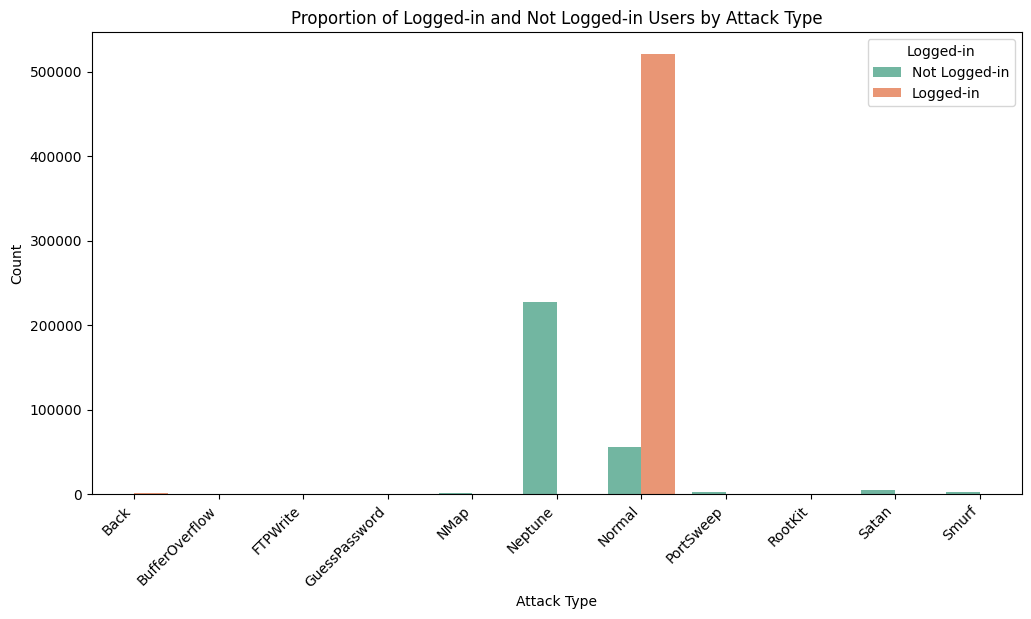

In [12]:
# Whatanak

# Create a bar chart for each attack type, comparing logged-in and not logged-in users side-by-side
plt.figure(figsize=(12, 6))
sns.countplot(x='attack', hue='logged_in', data=df, palette='Set2', dodge=True)
plt.title('Proportion of Logged-in and Not Logged-in Users by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.legend(title='Logged-in', loc='upper right', labels=['Not Logged-in', 'Logged-in'])
plt.xticks(rotation=45, ha='right')
plt.show()


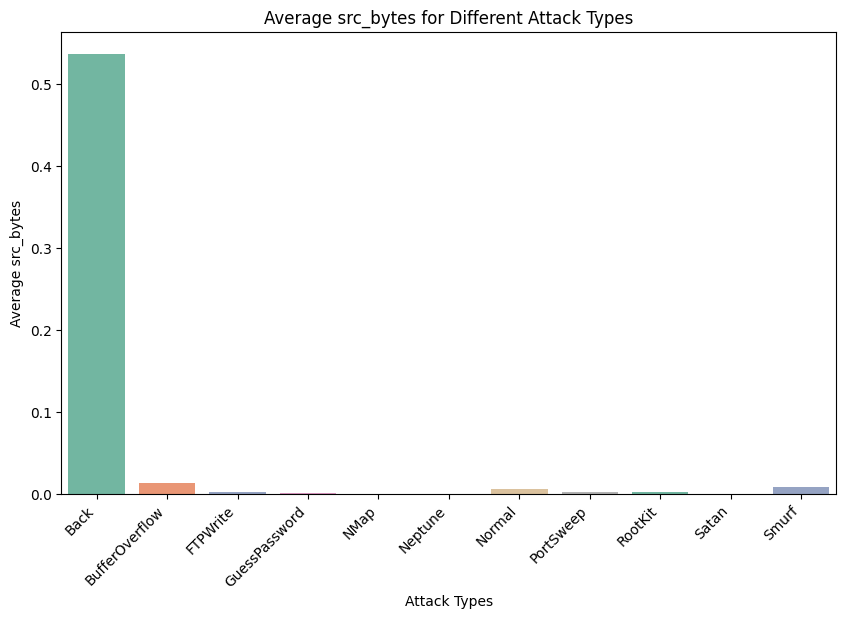

In [13]:
# Whatanak

# Bar plot: Comparing average src_bytes for each attack type
average_src_bytes_by_attack = df.groupby('attack')['src_bytes'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='attack', y='src_bytes', data=average_src_bytes_by_attack, palette='Set2')
plt.title('Average src_bytes for Different Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Average src_bytes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 5 - Hypothesis Generation